# Merged Best Neighborhood Final Notebook

## Setting Up The Three Metrics
    Before we are actually able to choose the overral best neighborhood with the three metric we need to import pandas.  This will allow us to read in the three data sets and merge them together to see which neighborhood appears the most often within the data sets.  

### DATASET 1 = SCHOOL ENROLLMENT NUMBERS

## Intro
To choose the best neighborhood in Pittsburgh, I chose the amount of enrollments in each neighborhood as a metric.  Since the number of students that are enrolled within each neighborhood shows the importance of education within each neighborhood.  But as well the availability of education to the youth of each area.  

Before getting into the code and sorting through the data set we first need to import pandas and matplotlib so that we can read in the data set and eventually plot it.  After doing so I can now able to drop all the columns that I do not need to look at and then drop all the rows that have no data for students enrolled.  Then I am able to sort the data and see the first top 20.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
#read in the dataset
enrollData = pd.read_csv("enrollments.csv")

#drop columns useless columns that aren't needed
enrollData = enrollData.drop(columns=["african_american","american_indian","asian__not_pacific_islander","hispanic","multiracial"
                                     ,"native_hawaiian_or_other_pacific_islander","white","attending_feeder","attending_nonfeeder","student_count_redactions"
                                     ,"total_with_feeder_status","feeder_count_redactions"])

#drops rows that do not have any data
enrollData=enrollData.dropna()

#prints the first 20 neighborhoods
enrollData.head(20)

#sorts the data with the top being the most students enrolled
enrollData = enrollData.sort_values(by=['total_students_enrolled'], ascending=False)

In [68]:
enrollData.head(20)

,neighborhood,total_students_enrolled,grade_level
107,Carrick,541.0,K-5
105,Brookline,526.0,K-5
286,Carrick,378.0,9-12
99,Beechview,339.0,K-5
284,Brookline,310.0,9-12
104,Brighton Heights,296.0,K-5
197,Carrick,293.0,6-8
168,Squirrel Hill South,286.0,K-5
131,Homewood North,282.0,K-5
195,Brookline,276.0,6-8


It can be seen in the table above that there are actually multiple groups of students that are actually being accounted for instead of just the whole total K-12.  Instead they are separted which causes a neighborhood to appear more than once within the top 20.  Which is why I need to group by neighborhoods and add up all the total students within each grade cluster.

In [69]:
# aggregate function to combine all the neighborhoods and add up all the students
combine = {"total_students_enrolled":"sum"}

# groups by neighborhood and adds up all the students
enrollData = enrollData.groupby(enrollData['neighborhood']).aggregate(combine)

# resorts the data in ascending order with the highest total students first
enrollData = enrollData.sort_values(by=['total_students_enrolled'], ascending=False)

# prints the top 20 out
enrollData.head(20)

,total_students_enrolled
neighborhood,
Carrick,1276.0
Brookline,1169.0
Beechview,794.0
Sheraden,694.0
Squirrel Hill South,679.0
Knoxville,616.0
Brighton Heights,598.0
Homewood North,589.0
East Hills,569.0


Now that a neighborhood will only appear once within the dataframe and have the correct total amount of students I am now able to plot the data as a bar graph to show the drastic differences between each neighborhood.

Text(0, 0.5, 'Number of Students Enrolled')

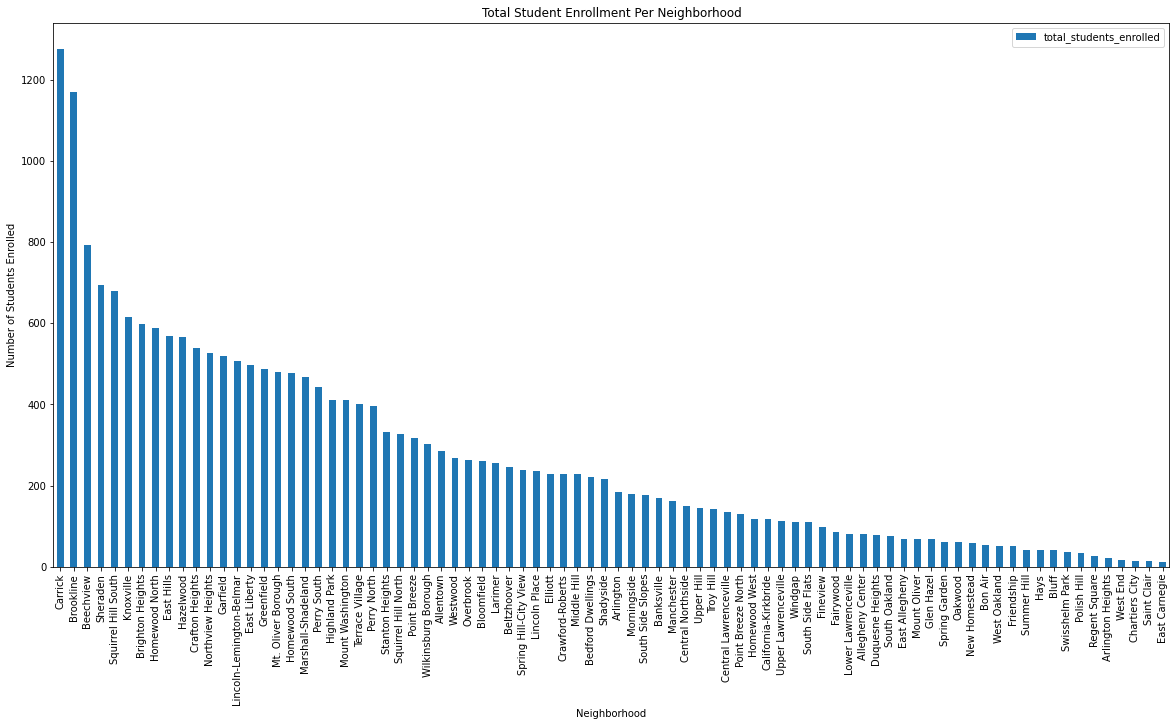

In [70]:
# Plot the data set as a bar graph
enrollData.plot(kind='bar',figsize=(20,10))

# set plot title and axis lables
plt.title('Total Student Enrollment Per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Students Enrolled')

# OUTCOME!!!
## Based off of the top 20 and the bar graph with no close contenders solely based on this metric Carrick wins as it has the most enrolled students!!!!!!

### DATASET 2 = REPORTED CRIME

***Introduction***: 
    In this project, I am looking for the best neighborhood in Pittsburgh. My metric is based on the number of crimes for each neighborhood. The more crime there are the worse the neighborhood. I am using the Police arrest dataset.
    


First import pandas,matplot,and csv

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
#read in the dataset
df = pd.read_csv("crime.csv")

#drop most of the columsn whose data were not needed. Got Arrest location,offenses,incidentlocation and neighborhood.
# I removed columns from 10 and onwards.
df=df.drop(df.iloc[:,10:],axis = 1)

#print the data frame
df

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights
...,...,...,...,...,...,...,...,...,...,...
61289,2056476,23029563,46.0,M,W,2023-02-26T16:44:00,"1300 Block Goettmann ST Pittsburgh, PA 15212",2701 Simple Assault. / 2706 Terroristic Threat...,"1300 Block Goettmann ST Pittsburgh, PA 15212",Troy Hill
61290,2056477,23029599,29.0,M,W,2023-02-26T17:52:00,"700 Block Brookline BL Pittsburgh, PA 15226",5101 Obstructing Admin. of Law / 5104 Resisti...,"700 Block Brookline BL Pittsburgh, PA 15226",Brookline
61291,2056478,23029601,26.0,M,W,2023-02-26T18:00:00,"Forbes AV & Wood ST Pittsburgh, PA 15222",9501 Bench Warrant,"Forbes AV & Wood ST Pittsburgh, PA 15222",Central Business District
61292,2056479,23029649,35.0,M,B,2023-02-26T19:47:00,"1300 Block Sherman AV Pittsburgh, PA 15212",2701 Simple Assault. / 5104 Resisting Arrest o...,"1300 Block Sherman AV Pittsburgh, PA 15212",Central North Side


Make a table view specific to Columns with what is relevant.

In [81]:
# group by neighborhood ,counts # of occurences of each unique neighborhood in "INCIDENTNEIGHBORHOOD" column
arrest_counts = df.groupby('INCIDENTNEIGHBORHOOD').agg(arrest_count=('INCIDENTNEIGHBORHOOD', 'size'))

#sort by most to least
arrest_counts = arrest_counts.sort_values(by=['arrest_count'],ascending = True)

#prints top 20 out
arrest_counts.head(20)



,arrest_count
INCIDENTNEIGHBORHOOD,
Mt. Oliver Neighborhood,2
Troy Hill-Herrs Island,6
Mt. Oliver Boro,18
Central Northside,23
Ridgemont,35
Regent Square,35
New Homestead,39
Swisshelm Park,40
Chartiers City,40


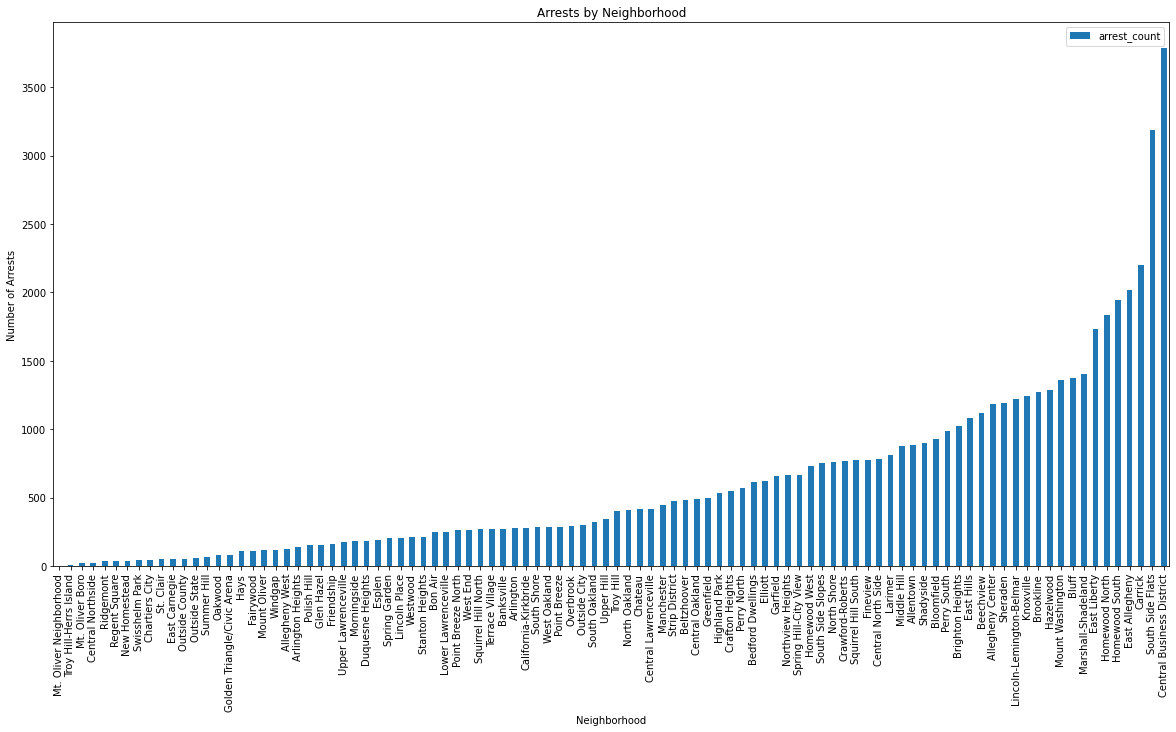

In [61]:
# plot in bar graph, figsize = (width,height)
arrest_counts.plot(kind='bar',x = "INCIDENTNEIGHBORHOOD",figsize=(20,10))

# set plot title and axis lables
plt.title('Arrests by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')

#Display plot
plt.show()


# OUTCOME!!!
### Based off of the top 20 and the bar graph with no close contenders solely based on this metric "Mt.Oliver Neighborhood" wins with a crime count of 2!!!!

### DATASET 3 = PLAYGROUNDS

In [42]:
#imprt pandas
import pandas as pd
import matplotlib.pyplot as plt


In [87]:
# read the csv, group by neighborhood + get count, sort high to low
df3 = pd.read_csv("playground.csv")

# group by neighborhood column, get the size of each group, 
# "count" is # of occurence for each neighborhood, "count parameter" counts number on non null values in specified column
df3 = df3.groupby("neighborhood").agg(count=('neighborhood','count'))
df3 = df3.sort_values(by= ['count'], ascending = False)

#prints the top 20 out
df3.head(20)



,count
neighborhood,
Squirrel Hill South,8
Beechview,5
South Side Slopes,5
Allegheny Center,4
Beltzhoover,4
Highland Park,4
Sheraden,4
Mount Washington,3
Elliott,3


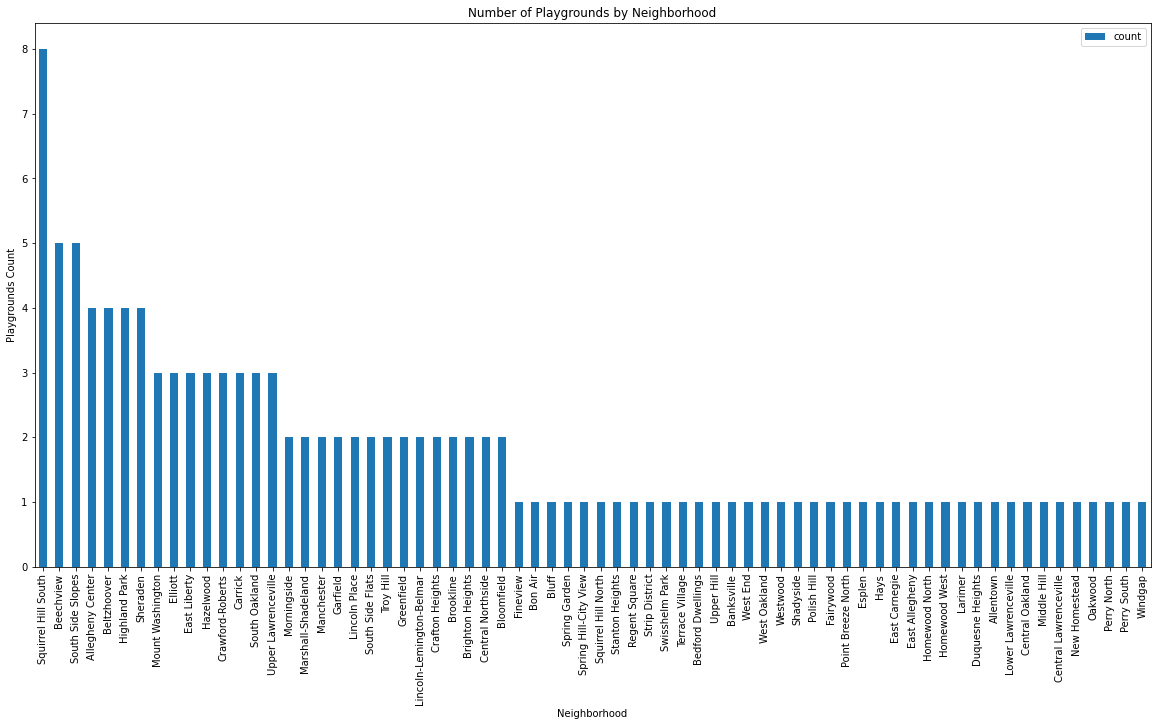

In [23]:
# x-axis = neighborhood ,y parameter =  specify the column to use as y axis
ax = df3.plot.bar(x="neighborhood", y="count",figsize=(20,10))
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Playgrounds Count")
ax.set_title("Number of Playgrounds by Neighborhood")
plt.show()



# SQUIRREL HILL SOUTH HAS MOST PARKS!

# MERGING ALL DATASETS


READ IN THE DATA

In [128]:
# read in arrests csv
arrests = pd.read_csv("crime.csv")

#renames the "INCIDENT NEIGHBORHOOD" column to "neighborhood" so we can use groupby
arrests =arrests.rename(columns={"INCIDENTNEIGHBORHOOD":"neighborhood"})

# read in playground csv
playgrounds =pd.read_csv("playground.csv")

# read in enrollment csv
enrollment = pd.read_csv("enrollments.csv")

In [135]:
# group by neighborhood , count the number in each neighborhood
#names the function output column to specified parameter in rename()
arrest_counts = arrests.groupby("neighborhood").size().rename("arrest_counts")
playground_counts = playgrounds.groupby("neighborhood").size().rename("playground_count")
enrollment_counts = enrollment.groupby("neighborhood")["total_students_enrolled"].sum().rename("enrollment_count")

In [130]:
# Merge data into one dataframe

#merges 2 df, the merged df will contain all rows from both df that have matching values in "neighborhood" column
#outer join = all rows will be included regardless if there is a match or not in other  df
merged_data = pd.merge(arrest_counts, playground_counts, on="neighborhood", how="outer")
merged_data = pd.merge(merged_data, enrollment_counts, on="neighborhood", how="outer")


In [133]:
# sort merged_data
#inplace = True, modifies the actual df itself instead of creating a new one and assigning it to new variable. original df will be updated with result of operation

# sort arrest_count data smallest to largest
merged_data.sort_values(by = ["arrest_counts"],ascending= True, inplace =True)
 
# sort enrollment_count largest to smallest
merged_data.sort_values(by =["enrollment_count"],ascending =False,inplace =True)

# sort play_ground_count largest to smallest
merged_data.sort_values(by = ["playground_count"], ascending =False, inplace =True)

#display merged_data
merged_data.head(30)

,arrest_counts,playground_count,enrollment_count
neighborhood,,,
Squirrel Hill South,771.0,8.0,679.0
South Side Slopes,752.0,5.0,177.0
Beechview,1116.0,5.0,794.0
Highland Park,530.0,4.0,412.0
Sheraden,1192.0,4.0,694.0
Allegheny Center,1181.0,4.0,80.0
Beltzhoover,481.0,4.0,245.0
South Oakland,324.0,3.0,76.0
Upper Lawrenceville,174.0,3.0,112.0


# BEST NEIGHBORHOOD: SQUIRREL HILL SOUTH